# Validation of scales using external metrics

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df_val = pd.read_excel('data/validation.xlsx')

In [28]:
colormap = {
    'S': '#C8042C',
    'V': '#1A4289',
    'DF': '#265BA4',
    'EL': '#BF2850',
    'SF': '#B42D27',
    'KF': '#24573E',
    'RV': '#D82E8A',
    'LA': '#E7B657',
    'ALT': '#75FB4C',
    'NB': '#1E4B57',
    'KD': '#566197',
    'FG': '#E4F04E',
    'DD': '#3470BC',
    'M': '#7A308B',
    'SIU': 'lightgrey',
    'UFG': 'lightgrey'
}


In [29]:
df_val
df_val['PG_eu_anti_pro']

0    0.9971
1    1.1830
2    3.5917
3    5.8301
4    7.4311
5    7.7791
6    9.0268
7    8.7000
8    6.5000
9    7.8594
Name: PG_eu_anti_pro, dtype: float64

In [30]:
df_val['Partyabb'] = [
    'EL',
    'DF',
    'SF',
    'KD',
    'S',
    'KF',
    'V',
    'LA',
    'ALT',
    'RV'
]

df_val['color'] = df_val['Partyabb'].map(colormap)

In [31]:
list(df_val.columns)

['Partyname',
 'Partyabb',
 'Type_Values',
 'Type_Populism',
 'Type_Populist_Values',
 'V1',
 'V2',
 'V4_Scale',
 'V4_Bin',
 'V4_Ord',
 'V5',
 'V6_Scale',
 'V6_Bin',
 'V6_Ord',
 'V7',
 'V8_Scale',
 'V8_Bin',
 'V8_Ord',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'Elec_year',
 'LSQINDEX',
 'PG_left_right',
 'PG_state_market',
 'PG_liberty_authority',
 'PG_eu_anti_pro',
 'Popu_List',
 'color']

In [32]:
val_cols = ['V6_Scale', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17']

df_val['values'] = df_val[val_cols].mean(axis=1)

In [33]:
df_val['values']

0    1.956730
1    5.401058
2    2.723425
3    4.805556
4    3.647487
5    4.739947
6    4.182981
7    4.652116
8    2.124647
9    2.420138
Name: values, dtype: float64

In [34]:
plt.style.use('seaborn-whitegrid')
import matplotlib.patheffects as pe
plt.rcParams['figure.dpi'] = 250

# define a funciton that takes a column from df_val and plots it as as sorted bar chart
def plot_bar(df, col, title, xlabel, ylabel, color):
    df = df.sort_values(col, ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(df['Partyabb'], rescale(df[col]), color=df[color])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# define a funciton to plot the same data as a 1-dimensional dot plot
def plot_dot(df, col, title, xlabel, color, jitter=False):
    plt.figure(figsize=(15, 2.5))
    if jitter:
        y_jitter = np.random.normal(scale=0.001, size=len(df[col]))
        plt.scatter(rescale(df[col]), y_jitter, color='white')
    else:
        plt.scatter(rescale(df[col]), np.zeros_like(rescale(df[col])), color=df[color])

    # add party labels
    for i, txt in enumerate(df['Partyabb']):
            plt.text(rescale(df[col])[i], y_jitter[i], txt, ha='center', va='center', fontsize=20, color=df[color][i], weight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='black')])
    
    plt.grid(False)
    plt.box(False)
    plt.yticks([])
    
    plt.axhline(y=0, color='darkgrey', linewidth=1)
    plt.axvline(x=0, color='darkgrey', linewidth=1, linestyle=':')

    plt.ylim(-0.005, 0.005)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

# define a function that takes a variable and rescales it to the range -1 to 1
def rescale(var):
    var = (var - var.min()) / (var.max() - var.min())
    var = 2 * var - 1
    return var

## EU stance

In [35]:
df_val[['Partyabb', 'PG_eu_anti_pro']]

,Partyabb,PG_eu_anti_pro
0,EL,0.9971
1,DF,1.1830
2,SF,3.5917
3,KD,5.8301
4,S,7.4311
5,KF,7.7791
6,V,9.0268
7,LA,8.7000
8,ALT,6.5000
9,RV,7.8594


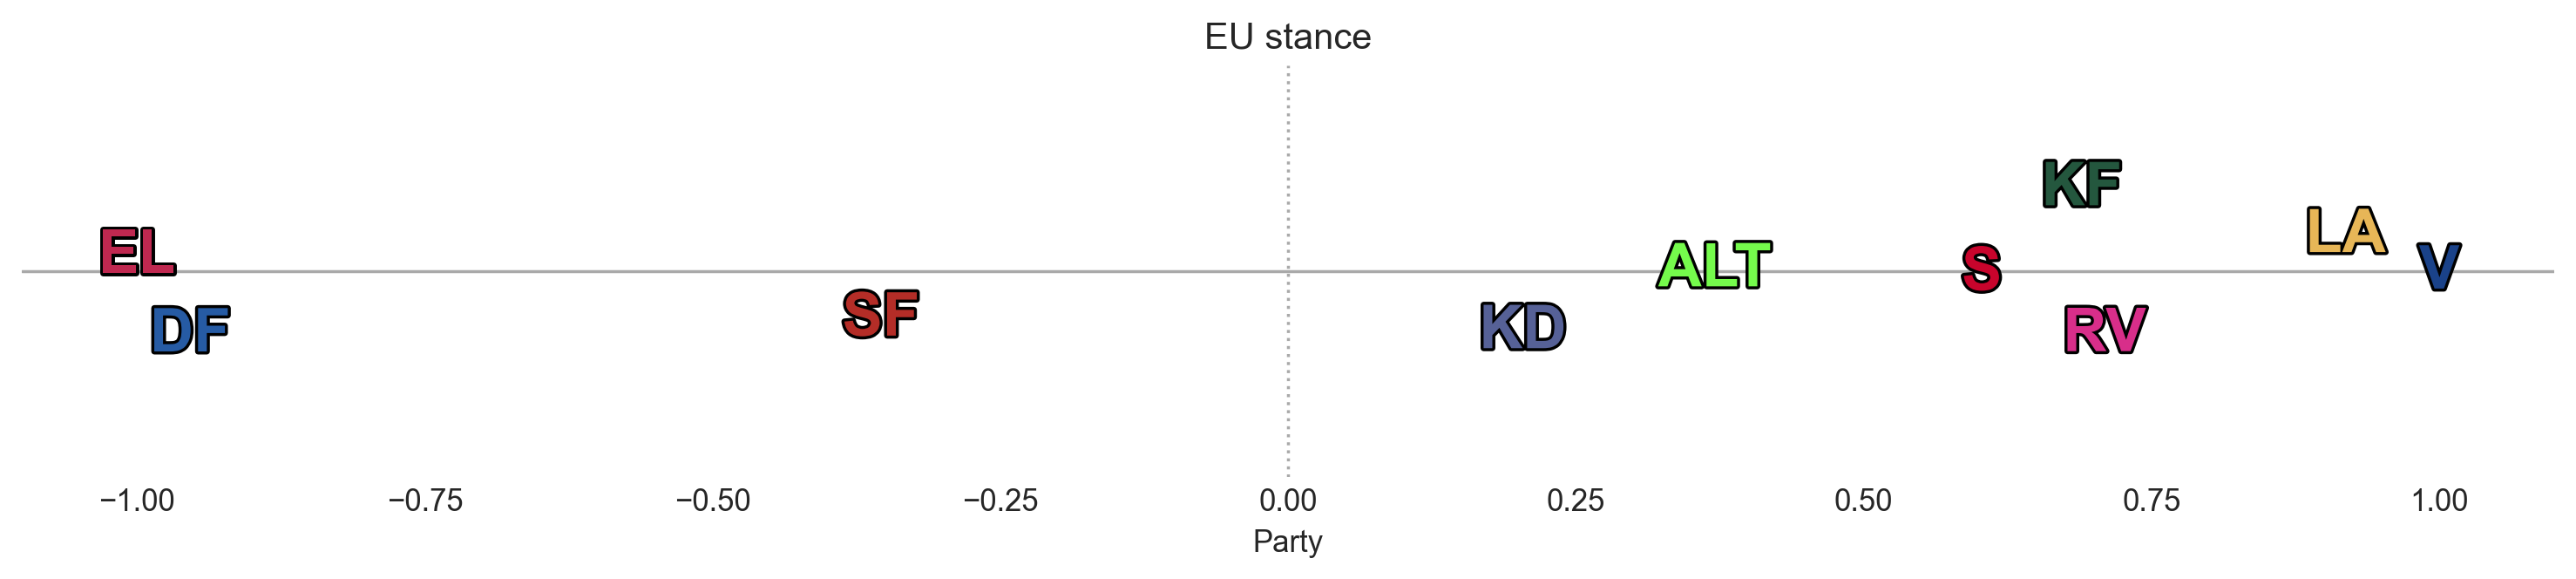

In [36]:
plot_dot(df_val, col = 'PG_eu_anti_pro', title = 'EU stance', xlabel = 'Party', color = 'color', jitter=True)

## Ideology

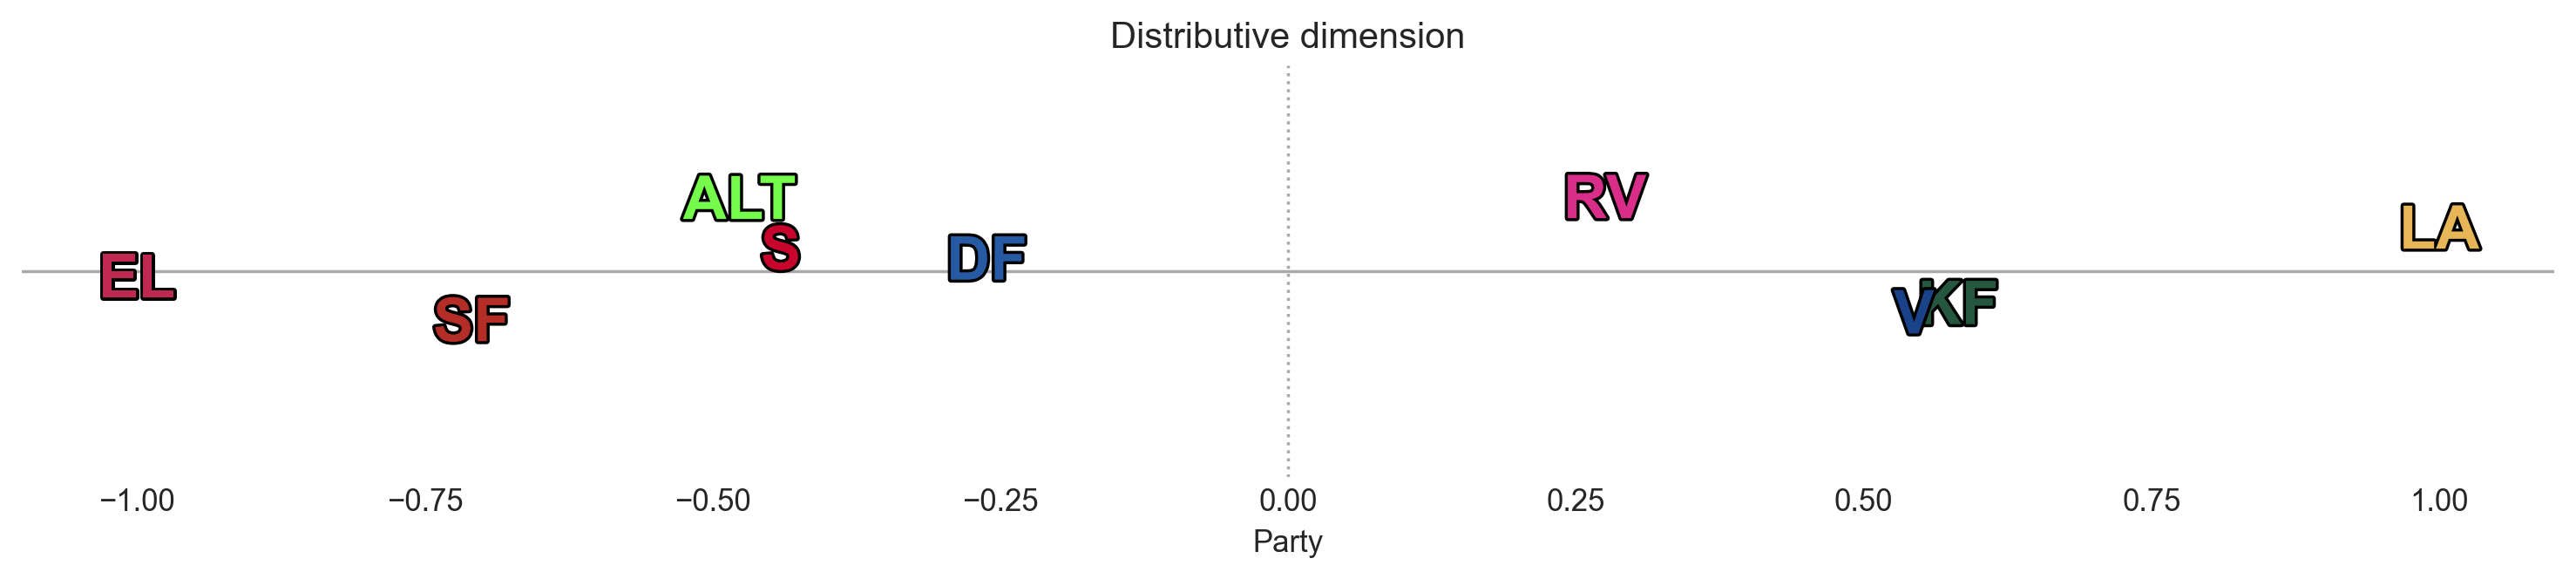

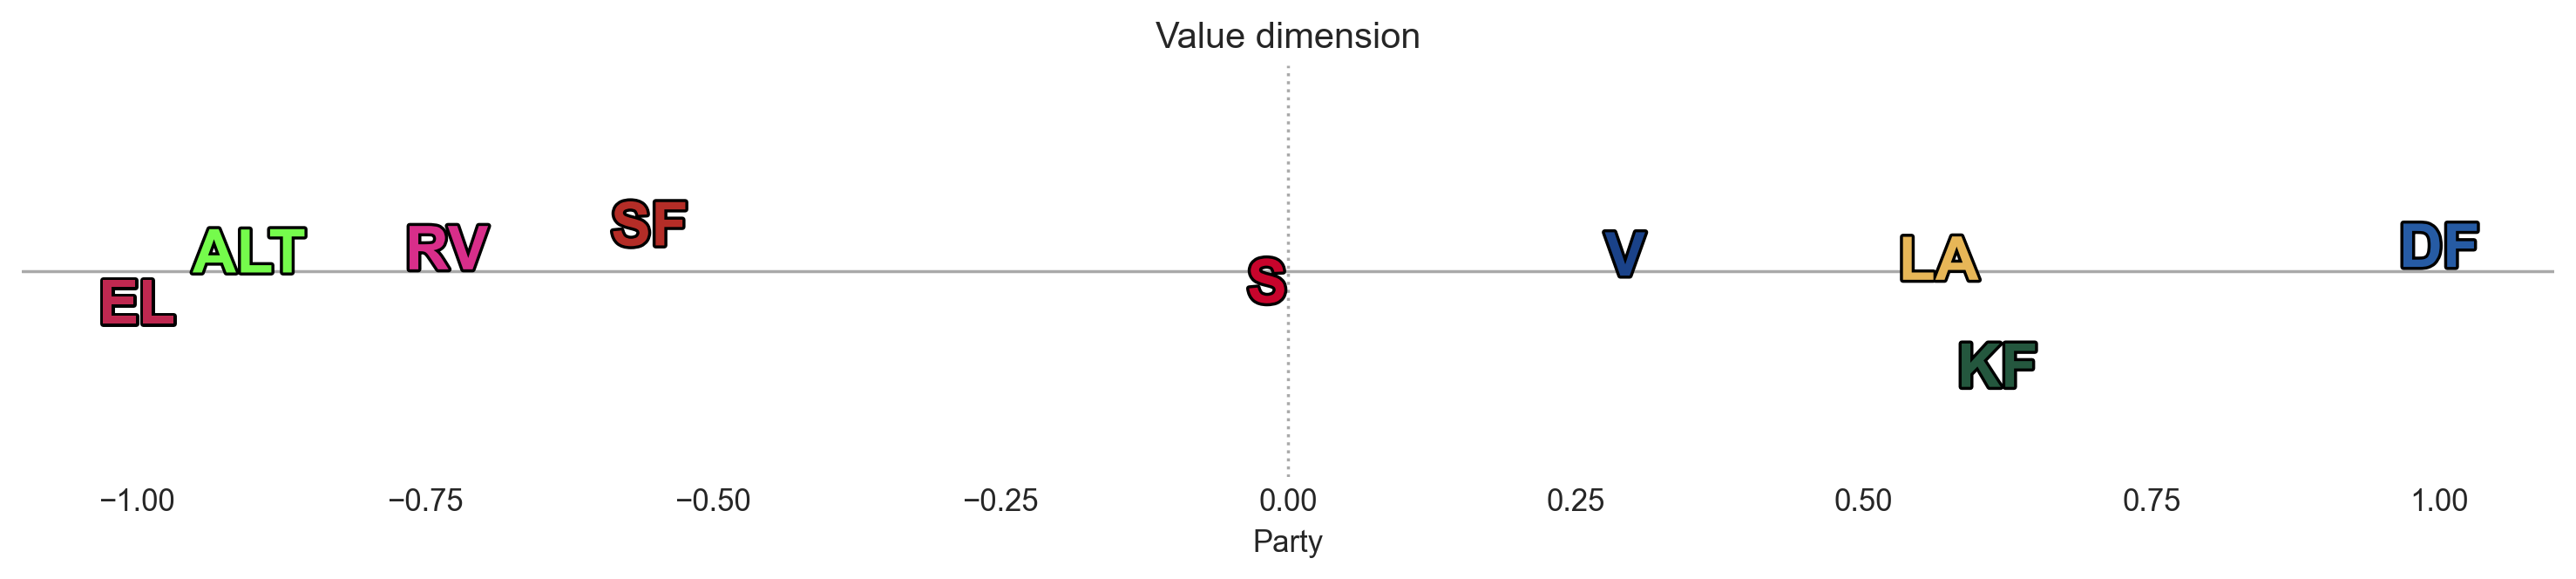

In [21]:
plot_dot(df_val, col = 'V4_Scale', title = 'Distributive dimension', xlabel = 'Party', color = 'color', jitter=True)
plot_dot(df_val, col = 'values', title = 'Value dimension', xlabel = 'Party', color = 'color', jitter=True)

In [11]:
df_test = pd.read_csv('data/plot_data_test.csv').drop(columns=['Unnamed: 0'])
df_test = df_test[~df_test['party'].isin(['NB', 'FG', 'DD', 'M', 'SIU', 'UFG'])].reset_index(drop=True)
df_test['color'] = df_test['party'].map(colormap)

In [12]:
df_test

,V4_scale,value,party,color
0,-0.068964,0.467416,S,#C8042C
1,0.506903,-0.231605,V,#1A4289
2,-0.289613,-0.713633,DF,#265BA4
3,-1.000000,0.655836,EL,#BF2850
4,-0.505281,0.591429,SF,#B42D27
5,0.413022,-0.320141,RV,#D82E8A
6,-0.128514,0.025803,KF,#24573E
7,1.000000,-0.530651,LA,#E7B657
8,-0.484514,0.877242,ALT,#75FB4C


In [13]:
# remove KD from both df_test and df_val and reset index:
df_test = df_test[~df_test['party'].isin(['KD'])].reset_index(drop=True)
df_val = df_val[~df_val['Partyabb'].isin(['KD'])].reset_index(drop=True)

In [14]:
# join the two dataframes by party name
df = df_test.merge(df_val, left_on='party', right_on='Partyabb')
df = df[['party', 'color_y', 'V4_Scale', 'V4_scale', 'values', 'value']]

In [15]:
for col in ['V4_Scale', 'values']:
    df[col] = rescale(df[col])

In [16]:
df

,party,color_y,V4_Scale,V4_scale,values,value
0,S,#C8042C,-0.440716,-0.068964,-0.018237,0.467416
1,V,#1A4289,0.543624,0.506903,0.292705,-0.231605
2,DF,#265BA4,-0.261745,-0.289613,1.000000,-0.713633
3,EL,#BF2850,-1.000000,-1.000000,-1.000000,0.655836
4,SF,#B42D27,-0.709172,-0.505281,-0.554807,0.591429
5,RV,#D82E8A,0.275168,0.413022,-0.730915,-0.320141
6,KF,#24573E,0.581975,-0.128514,0.616116,0.025803
7,LA,#E7B657,1.000000,1.000000,0.565116,-0.530651
8,ALT,#75FB4C,-0.476510,-0.484514,-0.902496,0.877242


In [17]:
# pearson correlation between V4 for validation and test data
from scipy.stats import pearsonr
print(pearsonr(df['V4_Scale'], df['V4_scale']))
print(pearsonr(df['values'], -df['value']))

(0.8989863059903689, 0.0009759494647892372)
(0.7492784916019095, 0.020128789331367233)


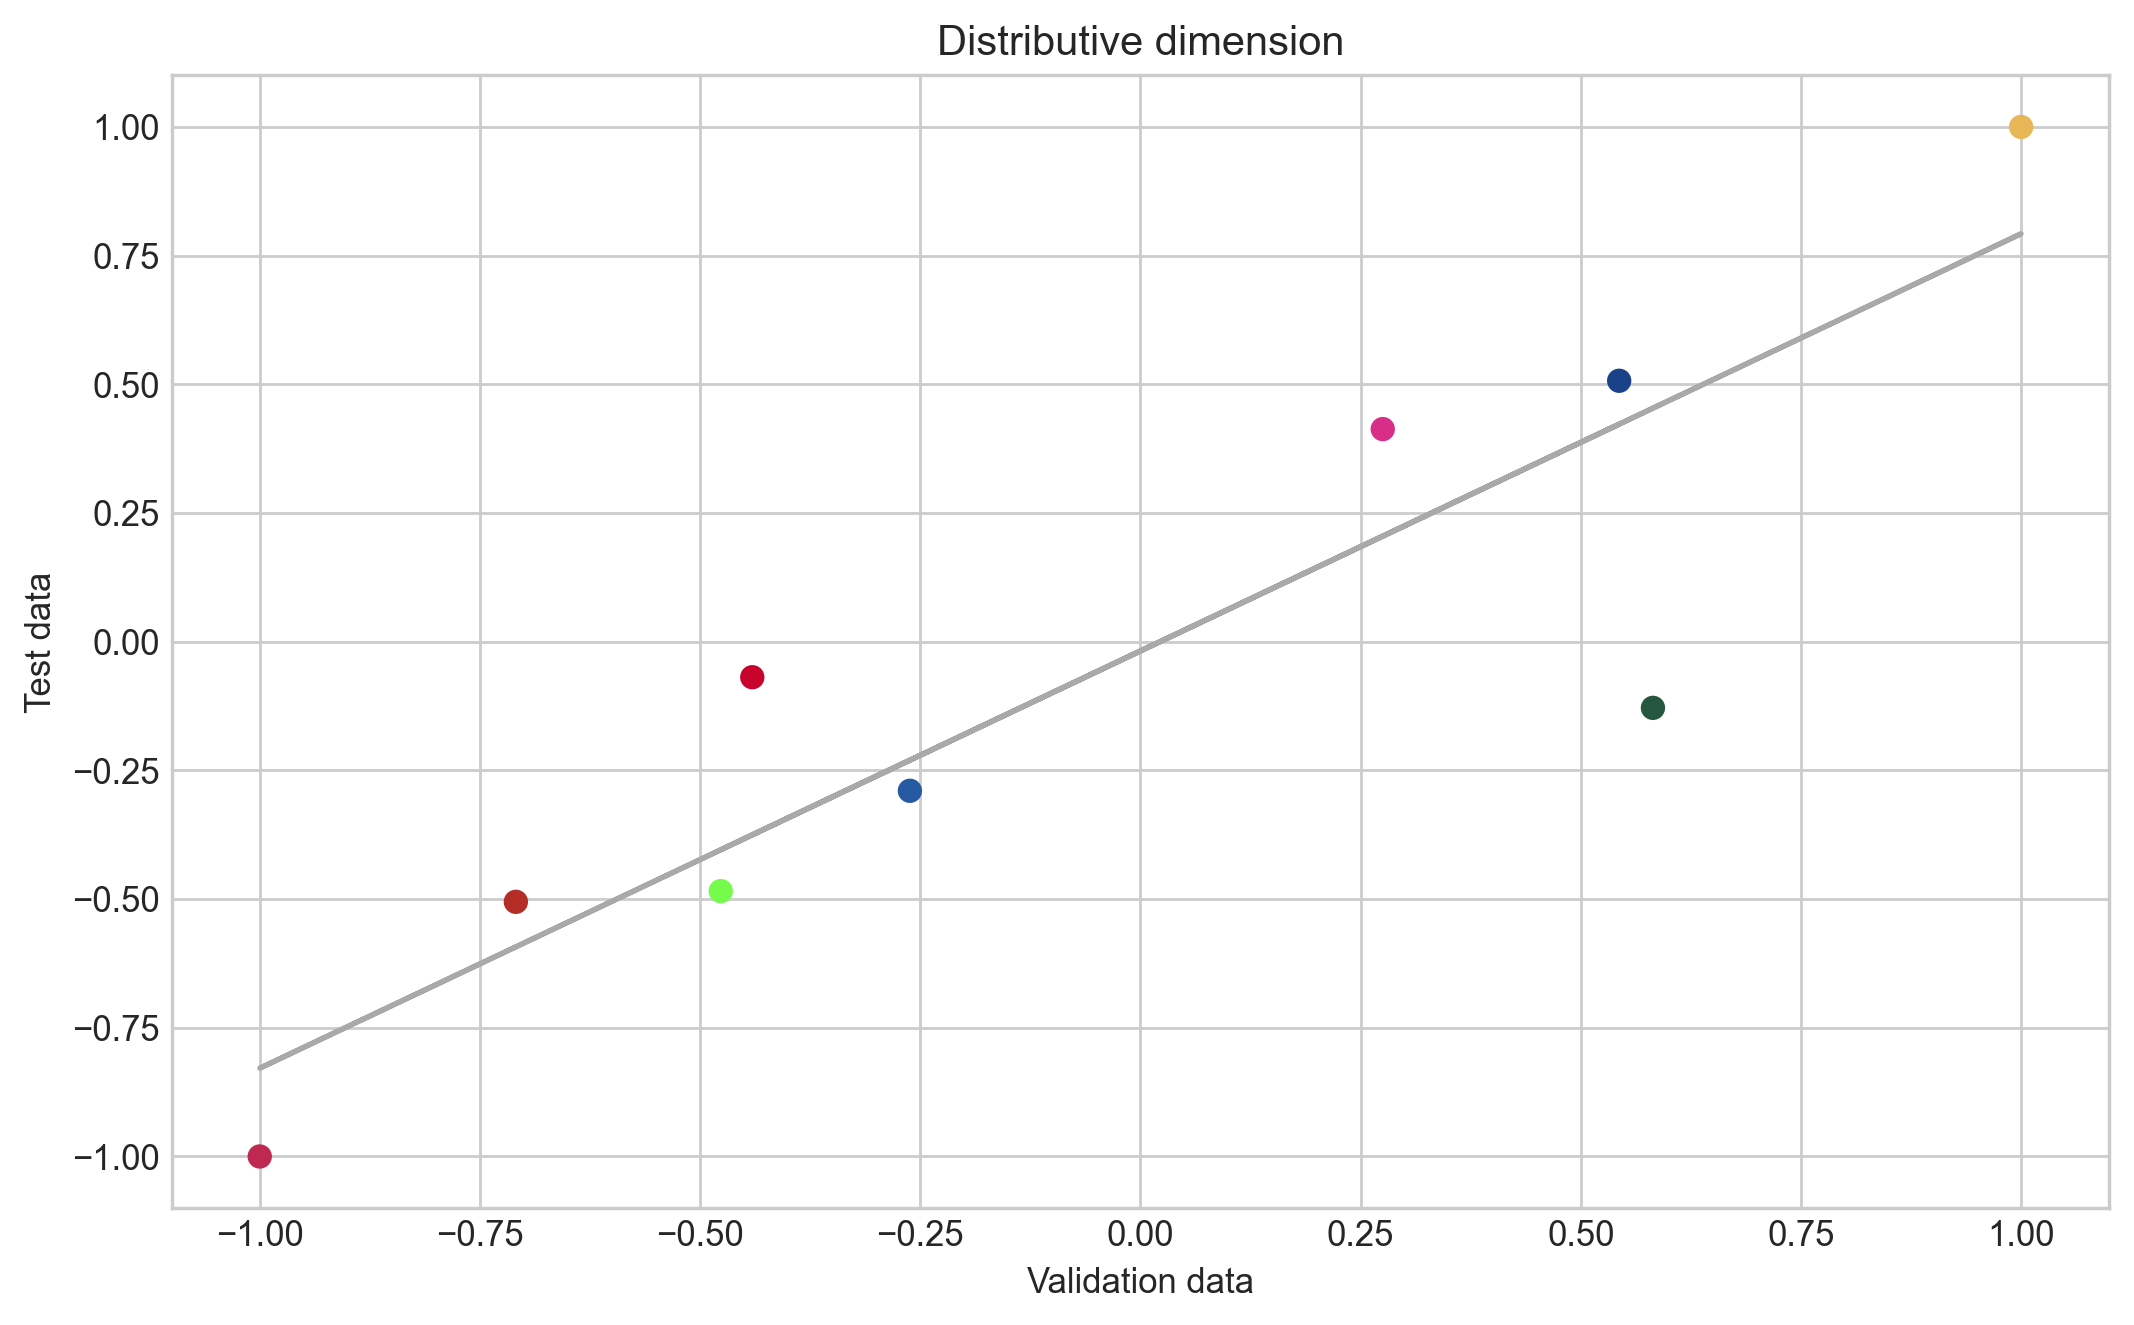

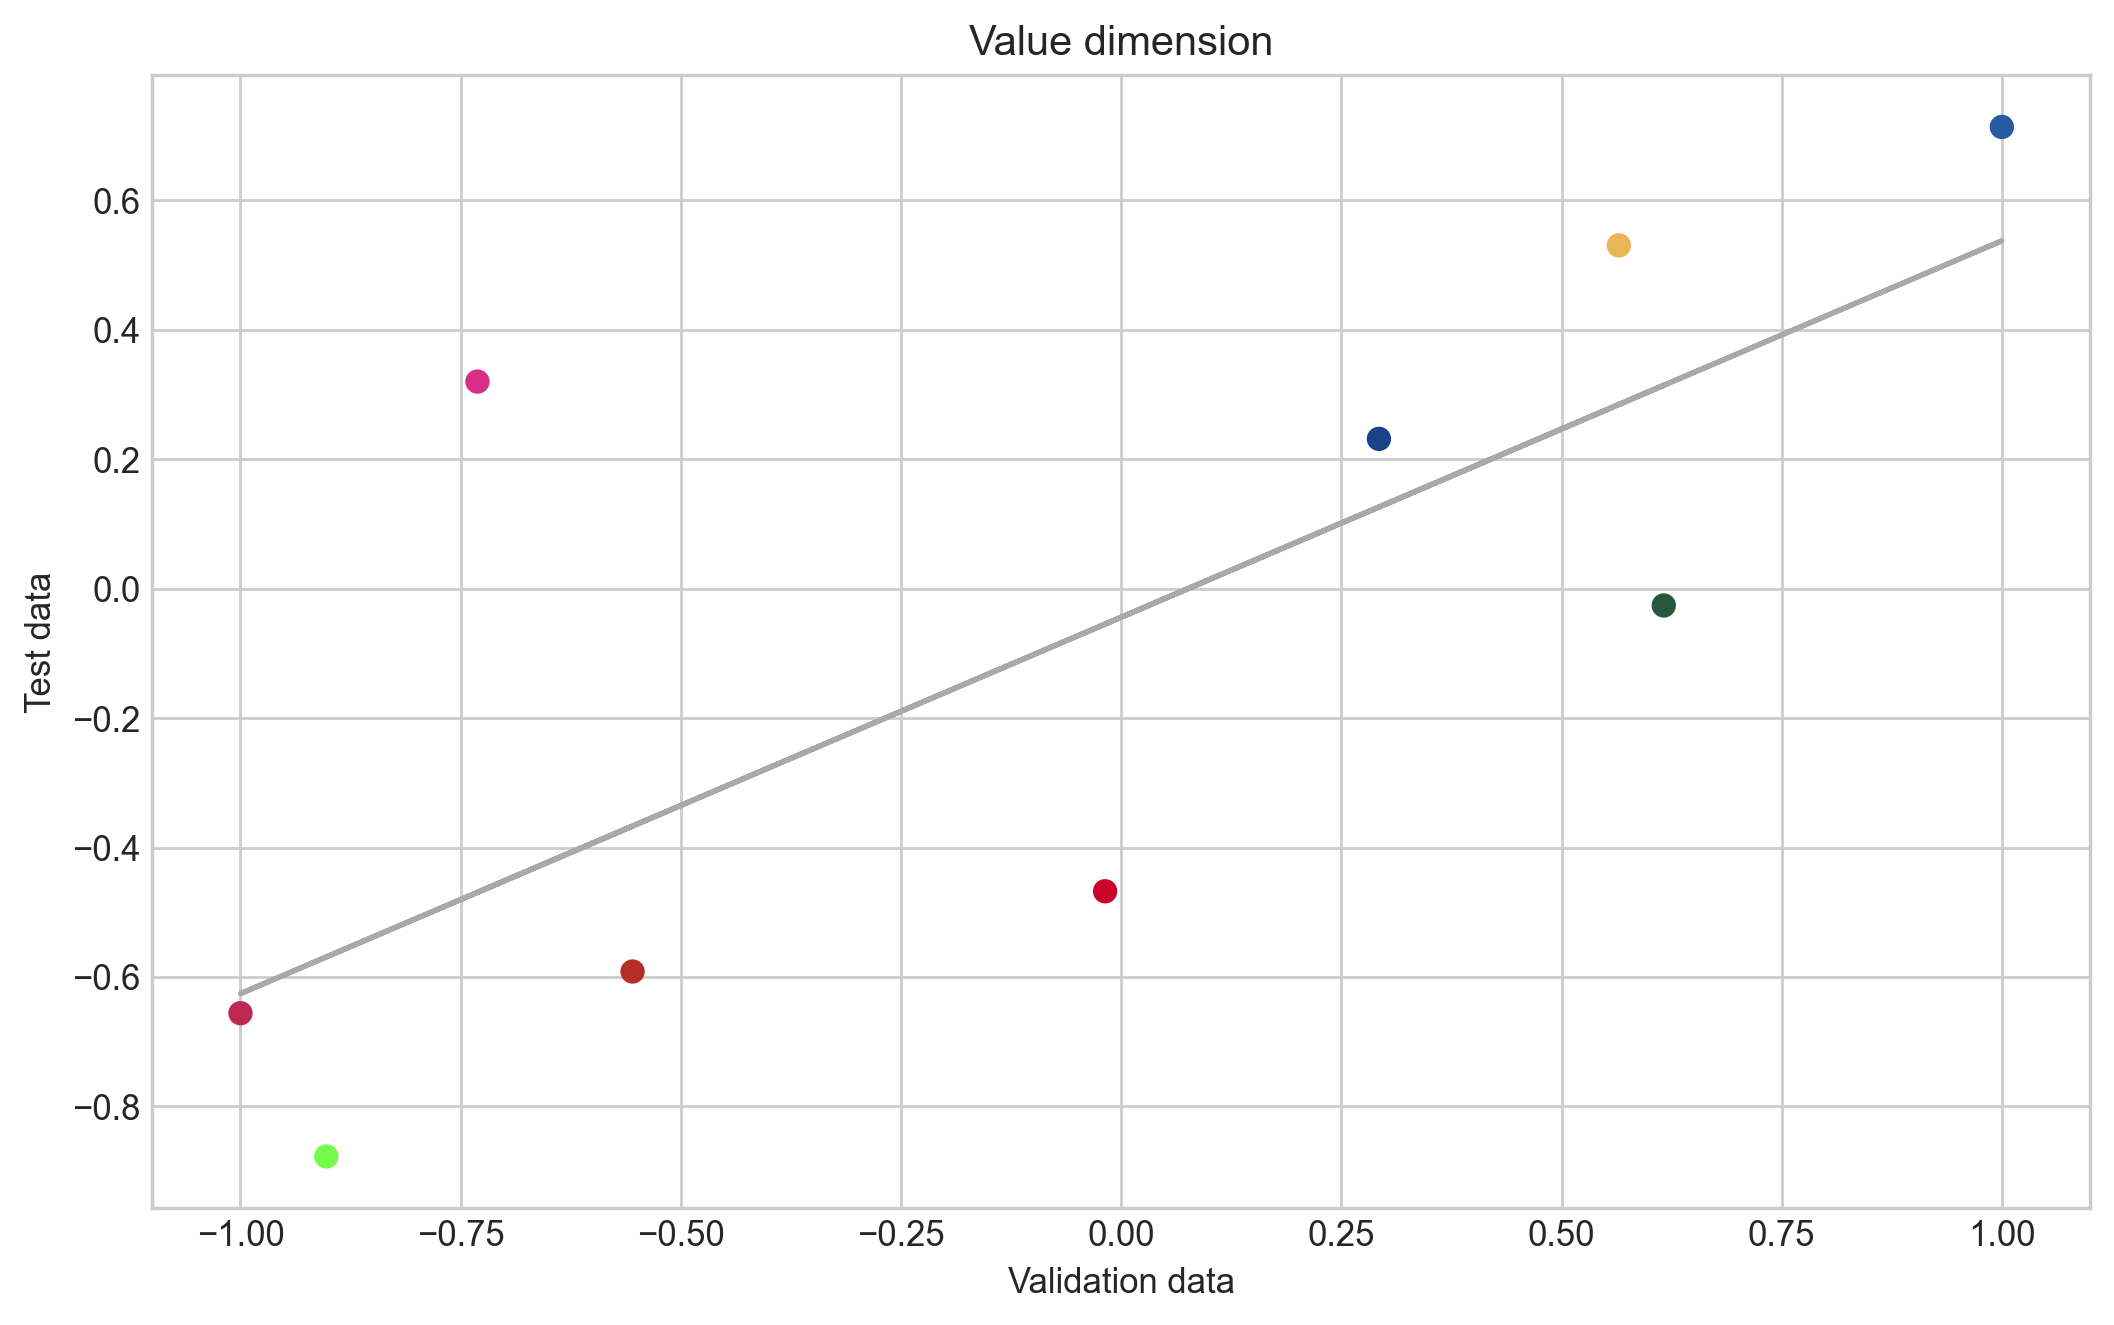

In [18]:
# plot  V4_Scale and V4_scale against each other
plt.figure(figsize=(10, 6))
plt.scatter(df['V4_Scale'], df['V4_scale'], color=df['color_y'])
plt.title('Distributive dimension')
plt.xlabel('Validation data')
plt.ylabel('Test data')
# add regline
m, b = np.polyfit(df['V4_Scale'], df['V4_scale'], 1)
plt.plot(df['V4_Scale'], m*df['V4_Scale'] + b, color='darkgrey')
plt.show()

# plot  values and value against each other
plt.figure(figsize=(10, 6))
plt.scatter(df['values'], -df['value'], color=df['color_y'])
plt.title('Value dimension')
plt.xlabel('Validation data')
plt.ylabel('Test data')
# add regline
m, b = np.polyfit(df['values'], -df['value'], 1)
plt.plot(df['values'], m*df['values'] + b, color='darkgrey')
plt.show()

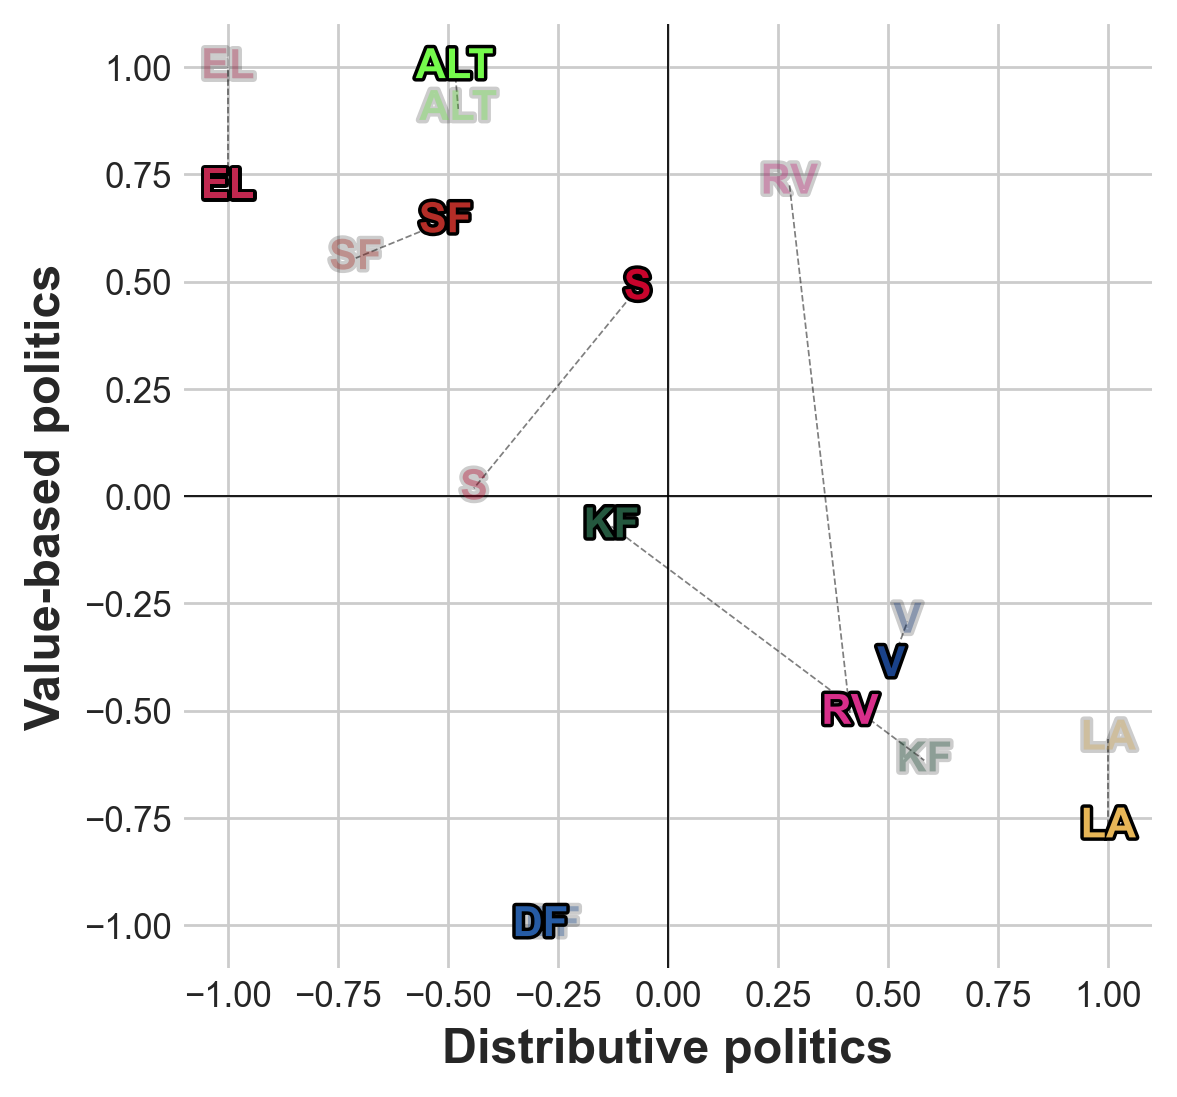

In [19]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel('Distributive politics', size = 14, weight = 'bold')
ax.set_ylabel('Value-based politics', size = 14, weight = 'bold')

ax.scatter(rescale(df_val['V4_Scale']), -rescale(df_val['values']), s=50, alpha=0.75, color='none')
ax.scatter(rescale(df_test['V4_scale']), rescale(df_test['value']), s=50, alpha=0.75, color='none')

# add party labels
for i, txt in enumerate(df_val['Partyabb']):
    ax.text(rescale(df_val['V4_Scale'])[i], -rescale(df_val['values'])[i], txt, ha='center', va='center', fontsize=12, color=df_val['color'][i], alpha=.2, weight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='black', alpha=.2)])

for i, txt in enumerate(df_test['party']):
    ax.text(rescale(df_test['V4_scale'])[i], rescale(df_test['value'])[i], txt, ha='center', va='center', fontsize=12, color=df_test['color'][i], alpha=1, weight='bold', path_effects=[pe.withStroke(linewidth=2, foreground='black', alpha=1)])

# add line segments between the same party from df_test and df_val
for i, txt in enumerate(df_test['party']):
    ax.plot([rescale(df_test['V4_scale'])[i], rescale(df_val['V4_Scale'])[df_val['Partyabb'] == txt].values[0]], [rescale(df_test['value'])[i], -rescale(df_val['values'])[df_val['Partyabb'] == txt].values[0]], color='black', alpha=0.5, linewidth=0.5, linestyle = '--')

# add vline to plot
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
ax.axhline(y=-0, color='black', linestyle='-', linewidth=0.5)

for spine in ax.spines.values():
    spine.set_visible(False)

# Show the plot
plt.show()

## Populism attempt

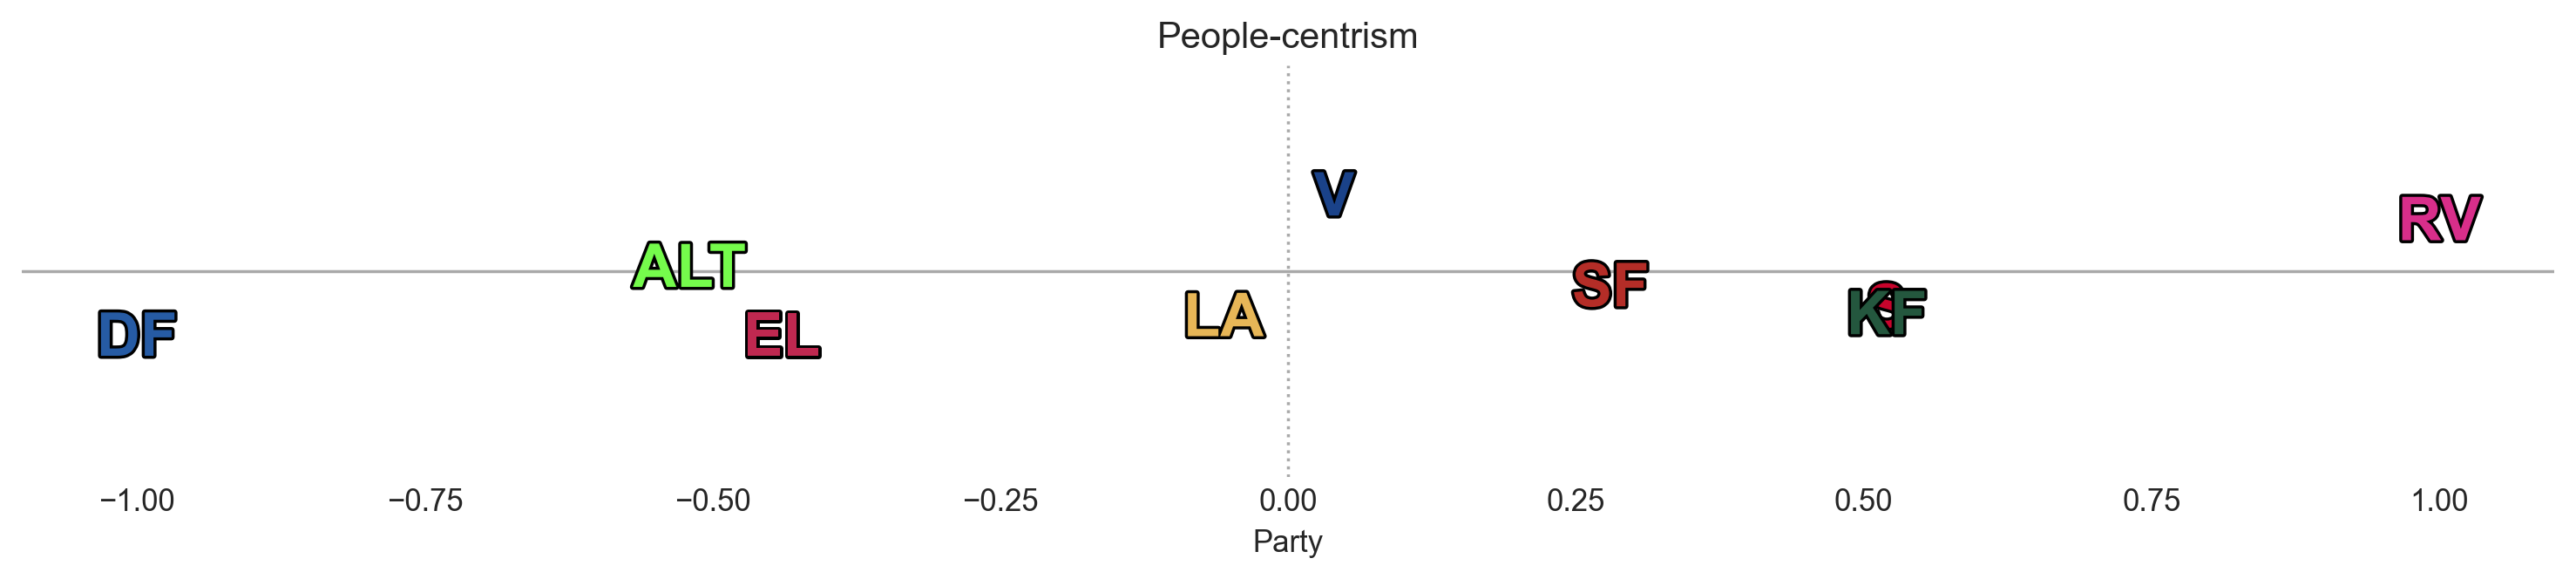

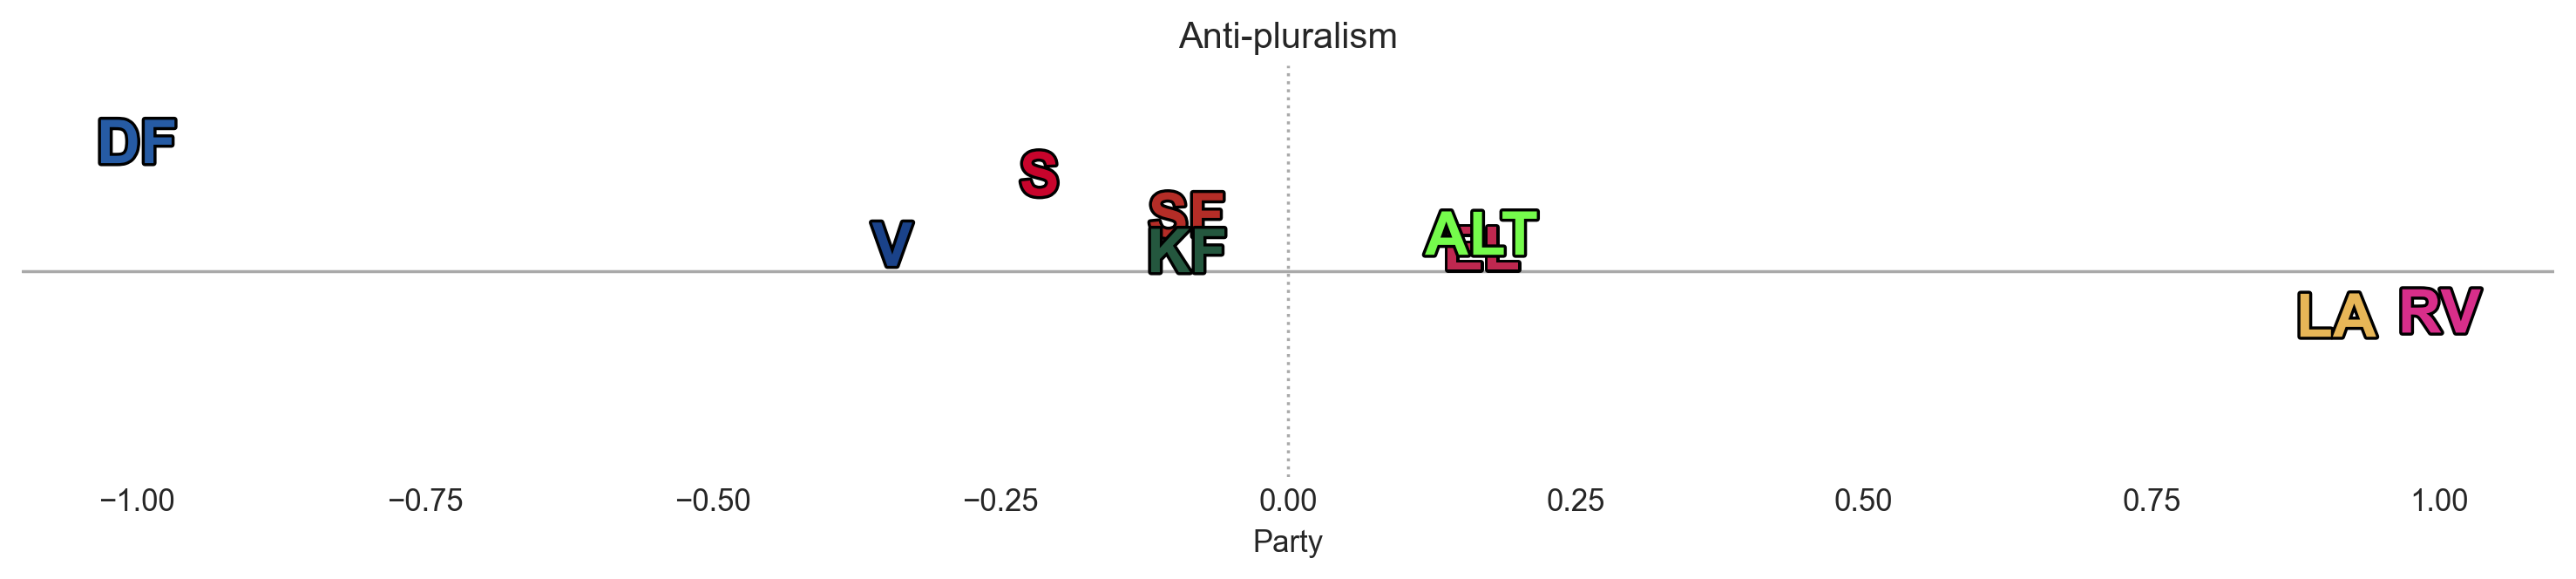

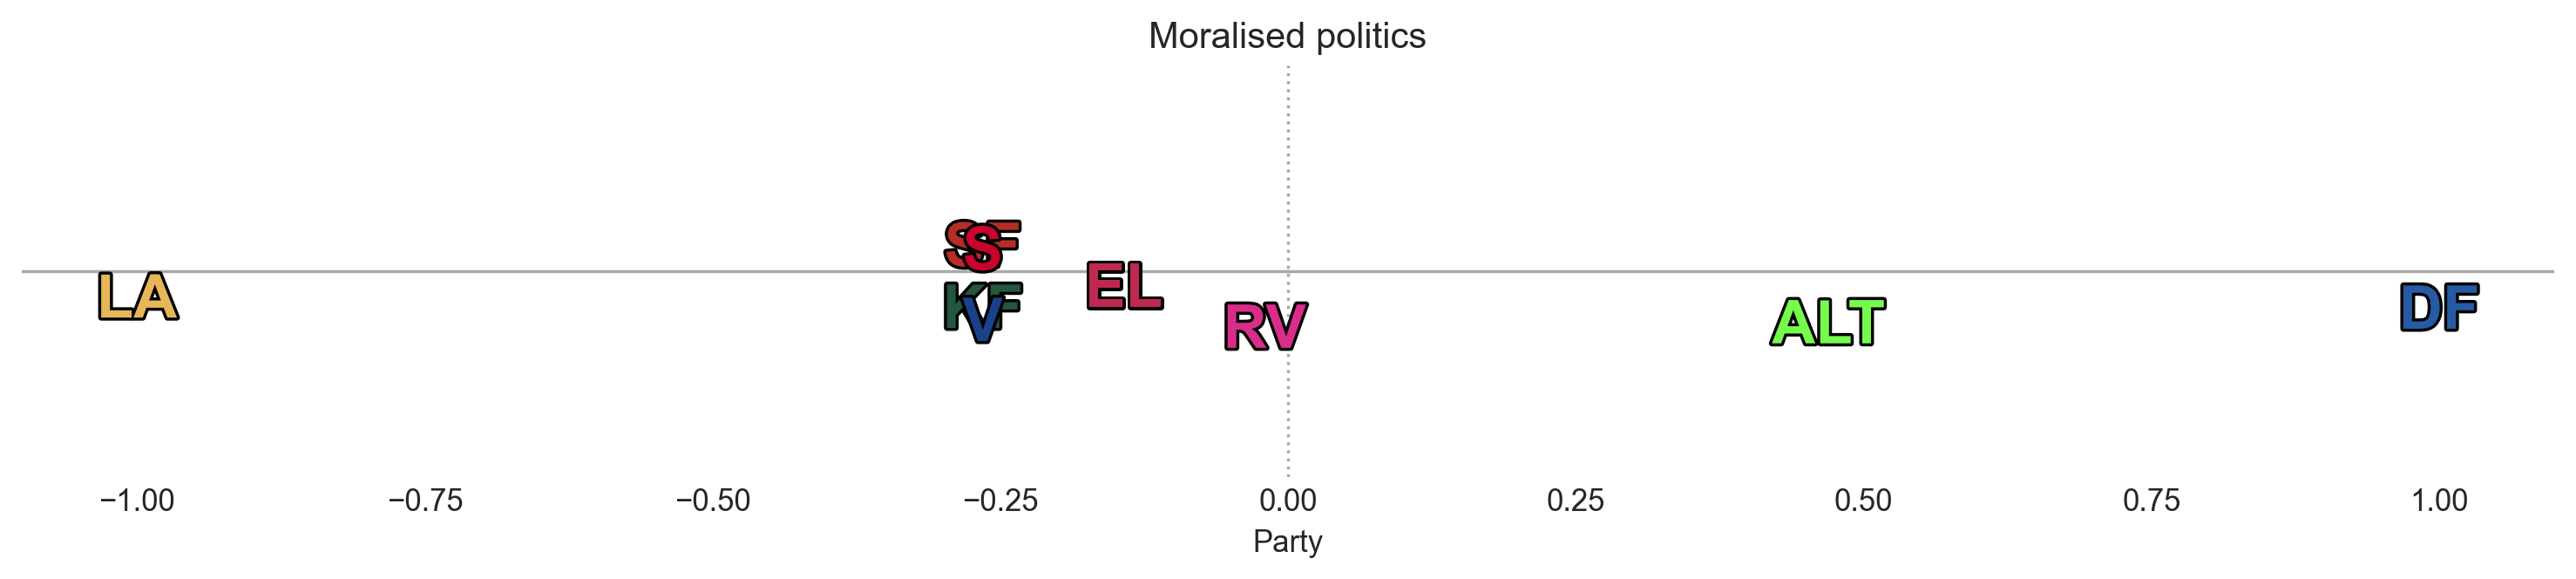

In [23]:
plot_dot(df_val, col = 'V19', title = 'People-centrism', xlabel = 'Party', color = 'color', jitter=True)
plot_dot(df_val, col = 'V18', title = 'Anti-pluralism', xlabel = 'Party', color = 'color', jitter=True) # add in some minority hate
plot_dot(df_val, col = 'V20', title = 'Moralised politics', xlabel = 'Party', color = 'color', jitter=True)